<a href="https://colab.research.google.com/github/4232177191/neumerical-datasets/blob/main/deiabet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [3]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
data.shape

(442, 11)

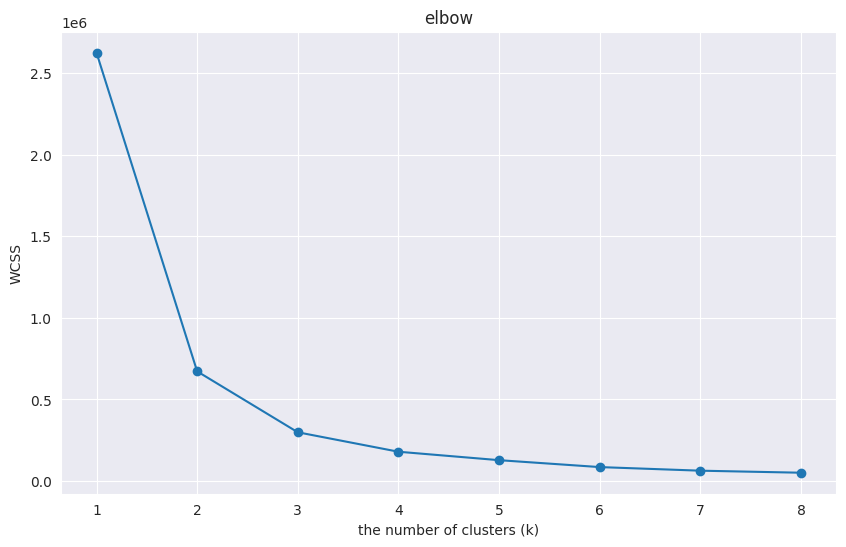

the optimal number of clustters: 5


In [6]:
#روش اول Kmean
#پیدا کردن kمناسب با استفده از elbow

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from seaborn import set_style
set_style('darkgrid')


wcss = []  # مجموع مربعات درون کلاسترها
max_k = 8 # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



# محاسبه نقطه عطف  به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر


# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clustters: {optimal_k}")


#  K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(data)

# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_



In [7]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,3
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,2


In [8]:
#row del
cleaned_df=data.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  target   442 non-null    float64
 11  Cluster  442 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 39.8 KB


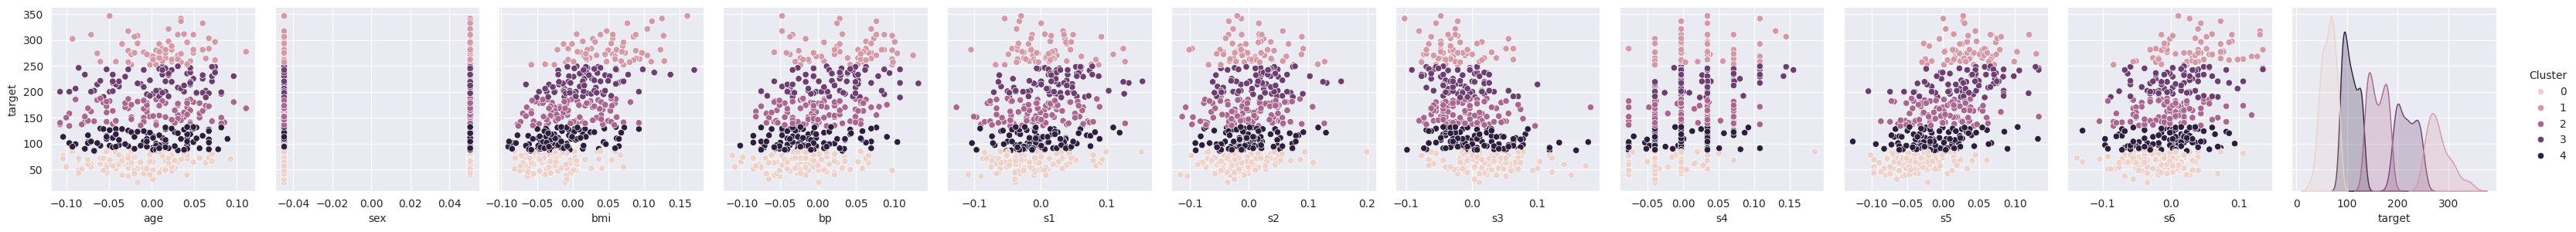

In [9]:
import seaborn as sns
import  matplotlib.pyplot as plt


#sns.pairplot(data,  y_vars=['target']  , x_vars = data.columns , height=3 )
sns.pairplot(data, y_vars=['target'], x_vars=data.columns[:-1], hue='Cluster', height=3)
plt.show()

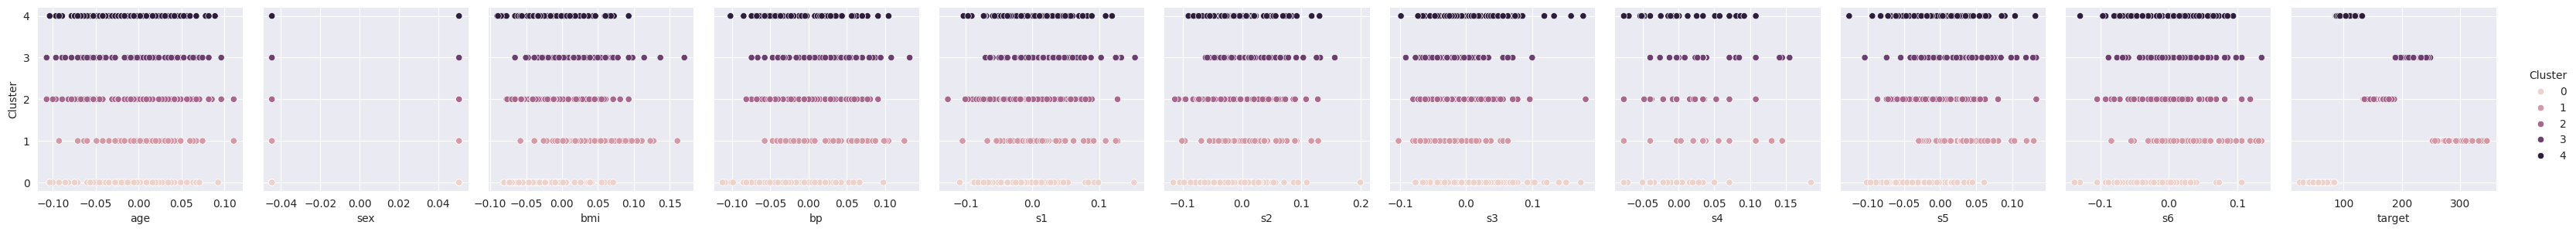

In [10]:
#sns.pairplot(data,  y_vars=['Cluster']  , x_vars = data.columns , height=3 )
sns.pairplot(data, y_vars=['Cluster'], x_vars=data.columns[:-1], hue='Cluster', height=3)
plt.show()

In [11]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# تبدیل به لیست
features =data.columns.tolist()

# نمایش نام ستون‌ها به عنوان یک لیست
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target', 'Cluster']


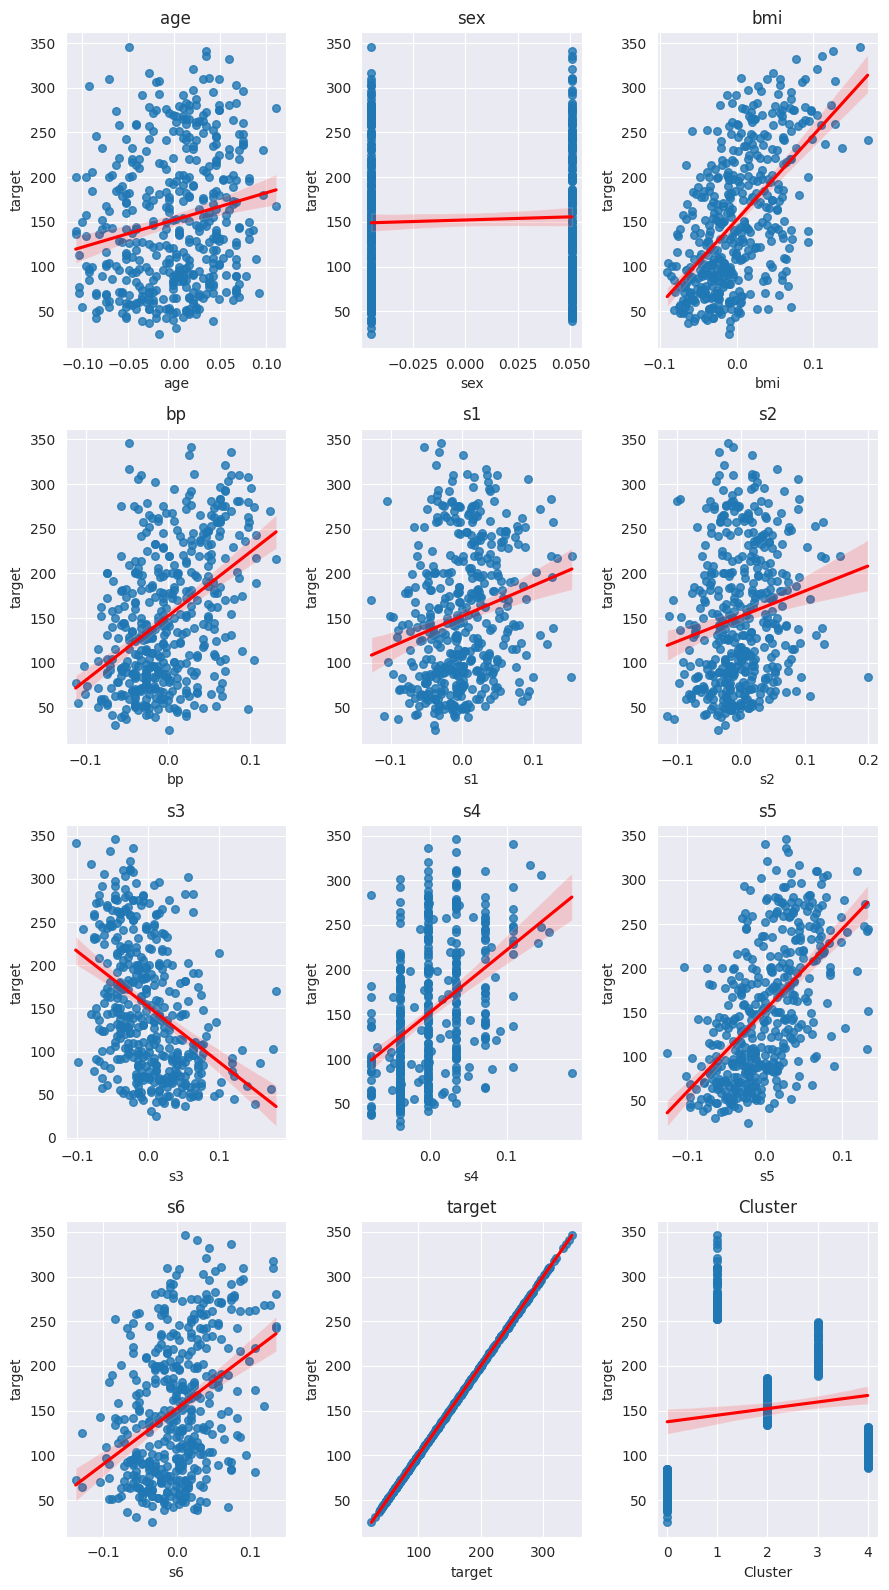

In [12]:
n_features = len(features)
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols,  figsize=(n_cols * 3, n_rows * 4), squeeze=False)

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Loop through each feature and plot scatter + regression line
for i, feature in enumerate(features):
    ax = axes_flat[i]

    # Scatter plot with regression line
    sns.regplot(data=data, x=feature, y='target', ax=ax, scatter_kws={"s": 30}, line_kws={"color": "red"})
    ax.set_title(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
data[features].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889,0.078589
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062,0.017553
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450,0.042587
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482,0.037235
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022,0.137175
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054,0.121806
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789,-0.097648
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453,0.126515
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883,0.190631
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483,0.034123


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


X1 = data.drop('target', axis=1)
X=X1.drop('Cluster', axis=1)
y = data['target']  # ستون هدف

# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل
knn.fit(X_train, y_train)

# پیش‌بینی
y_pred = knn.predict(X_test)

# محاسبه خطای میانگین مربعات
mse1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error KNN Regression: {mse1}')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل
linear_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = linear_model.predict(X_test)

# محاسبه خطای میانگین مربعات
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error linear Regression: {mse2}')


# ایجاد مدل رگرسیون ریج
ridge_model = Ridge(alpha=1.0)

# آموزش مدل رگرسیون ریج
ridge_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون ریج
y_pred_ridge = ridge_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون ریج
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')

# ایجاد مدل رگرسیون لاسو
lasso_model = Lasso(alpha=1.0)

# آموزش مدل رگرسیون لاسو
lasso_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون لاسو
y_pred_lasso = lasso_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون لاسو
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')


Mean Squared Error KNN Regression: 3031.242382271468
Mean Squared Error linear Regression: 2863.4579020153615
Mean Squared Error (Ridge Regression): 3028.113055308573
Mean Squared Error (Lasso Regression): 3378.4580807641973


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso


X1 = data.drop('target', axis=1)
X = X1.drop('Cluster', axis=1)
y = data['target']  # ستون هدف

# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل KNN
knn.fit(X_train, y_train)

# پیش‌بینی با KNN
y_pred_knn = knn.predict(X_test)

# محاسبه خطای میانگین مربعات برای KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'Mean Squared Error (KNN): {mse_knn}')

# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل رگرسیون خطی
linear_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون خطی
y_pred_linear = linear_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون خطی
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

# ایجاد مدل رگرسیون ریج
ridge_model = Ridge(alpha=1.0)

# آموزش مدل رگرسیون ریج
ridge_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون ریج
y_pred_ridge = ridge_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون ریج
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')

# ایجاد مدل رگرسیون راسو
lasso_model = Lasso(alpha=1.0)

# آموزش مدل رگرسیون راسو
lasso_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون راسو
y_pred_lasso = lasso_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون راسو
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')

Mean Squared Error (KNN): 3031.242382271468
Mean Squared Error (Linear Regression): 2863.4579020153615
Mean Squared Error (Ridge Regression): 3028.113055308573
Mean Squared Error (Lasso Regression): 3378.4580807641973


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from collections import Counter


X1 = data.drop('target', axis=1)
X = X1.drop('Cluster', axis=1)
y = data['Cluster']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# نزدیک‌ترین همسایه‌ها را برای هر ویژگی پیدا کنیم
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_train.values)

# برای ذخیره پیش‌بینی‌ها و نزدیک‌ترین همسایه‌ها
all_predictions = []
all_neighbors = []

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    predicted_per_feature = []  # لیستی برای ذخیره پیش‌بینی‌های هر ویژگی
    neighbors_per_feature = []   # لیستی برای ذخیره همسایه‌ها

    # برای هر ویژگی در نمونه تست
    for j in range(X_test.shape[1]):
        test_value = X_test.iloc[test_index].values.reshape(1, -1)  # تبدیل به شکل مناسب
        distances, indices = nbrs.kneighbors(test_value)  # پیدا کردن نزدیک‌ترین همسایه‌ها

        # گرفتن تارگت‌های نزدیک‌ترین همسایه‌ها
        nearest_targets = y_train.iloc[indices.flatten()]

        # محاسبه مد با استفاده از Counter
        if len(nearest_targets) > 0:  # مطمئن شوید که حداقل یک مقدار وجود دارد
            counts = Counter(nearest_targets)
            pj = counts.most_common(1)[0][0]  # دسترسی به اولین مد
        else:
            pj = None  # اگر هیچ مقداری وجود نداشت

        predicted_per_feature.append(pj)  # پیش‌بینی هر ویژگی را ذخیره می‌کنیم
        neighbors_per_feature.append(nearest_targets.tolist())  # همسایگان را اضافه می‌کنیم

    # اضافه کردن پیش‌بینی‌ها و همسایگان به آرایه کلی
    all_predictions.append(predicted_per_feature)
    all_neighbors.append(neighbors_per_feature)

# نمایش پیش‌بینی‌ها و همسایه‌ها برای هر نمونه تست
#for i, (preds, neighbors) in enumerate(zip(all_predictions, all_neighbors)):
    #print(f'Test Sample {i + 1}:')

    #print(f'  Predictions per Feature: {preds}')
    #print(f'  Neighbors per Feature: {neighbors}')

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from collections import Counter


X1 = data.drop('target', axis=1)
X = X1.drop('Cluster', axis=1)
y = data['target']


clusters = data['Cluster']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(X, y, clusters, test_size=0.13, random_state=0)

# نزدیک‌ترین همسایه‌ها را برای هر ویژگی پیدا کنیم
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_train.values)

# برای ذخیره پیش‌بینی‌ها و نزدیک‌ترین همسایه‌ها
all_predictions = []
cluster_predictions = []  # برای پیش‌بینی‌های کلاستری

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    test_value = X_test.iloc[test_index].values.reshape(1, -1)  # تبدیل به شکل مناسب
    distances, indices = nbrs.kneighbors(test_value)  # پیدا کردن نزدیک‌ترین همسایه‌ها

    # گرفتن تارگت‌های نزدیک‌ترین همسایه‌ها و کلاسترهایشان
    nearest_targets = y_train.iloc[indices.flatten()]
    nearest_clusters = clusters_train.iloc[indices.flatten()]

    # 1- محاسبه مد کلاستر همسایگان برای پیش‌بینی کلاستر
    if len(nearest_clusters) > 0:
        majority_cluster = Counter(nearest_clusters).most_common(1)[0][0]  # کلاستر مجوریتی پیش‌بینی

        # ذخیره پیش‌بینی کلاستر
        cluster_predictions.append(majority_cluster)
    else:
        majority_cluster = None
        cluster_predictions.append(majority_cluster)

    # 2-محاسبه میانگین تارگت عددی برای همسایگانی که کلاسترشان برابر با کلاستر مجوریتی است
    if majority_cluster is not None:
        relevant_targets = nearest_targets[nearest_clusters == majority_cluster]  # انتخاب تارگت‌های مرتبط

        if len(relevant_targets) > 0:
            predicted_value = relevant_targets.mean()  # محاسبه میانگین تارگت‌ها
        else:
            predicted_value = None  # اگر هیچ پیش‌بینی‌ای وجود نداشته باشد
    else:
        predicted_value = None

    all_predictions.append(predicted_value)  # پیش‌بینی عددی

# نمایش پیش‌بینی‌ها و کلاسترهای پیش‌بینی شده برای هر نمونه تست
for i in range(X_test.shape[0]):
    print(f'Test Sample {i + 1}:')
    print(f'  Predicted Cluster: {cluster_predictions[i]}')
    print(f'  Predicted Value: {all_predictions[i]}')

Test Sample 1:
  Predicted Cluster: 1
  Predicted Value: 288.4
Test Sample 2:
  Predicted Cluster: 3
  Predicted Value: 229.16666666666666
Test Sample 3:
  Predicted Cluster: 4
  Predicted Value: 115.16666666666667
Test Sample 4:
  Predicted Cluster: 2
  Predicted Value: 161.625
Test Sample 5:
  Predicted Cluster: 1
  Predicted Value: 270.8
Test Sample 6:
  Predicted Cluster: 1
  Predicted Value: 284.0
Test Sample 7:
  Predicted Cluster: 0
  Predicted Value: 61.0
Test Sample 8:
  Predicted Cluster: 2
  Predicted Value: 168.375
Test Sample 9:
  Predicted Cluster: 2
  Predicted Value: 163.16666666666666
Test Sample 10:
  Predicted Cluster: 1
  Predicted Value: 280.7
Test Sample 11:
  Predicted Cluster: 2
  Predicted Value: 169.8
Test Sample 12:
  Predicted Cluster: 3
  Predicted Value: 222.4
Test Sample 13:
  Predicted Cluster: 0
  Predicted Value: 65.0
Test Sample 14:
  Predicted Cluster: 0
  Predicted Value: 58.27272727272727
Test Sample 15:
  Predicted Cluster: 1
  Predicted Value: 29

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.metrics import mean_squared_error


X1 = data.drop('target', axis=1)
X = X1.drop('Cluster', axis=1)
y = data['target']
clusters = data['Cluster']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(X, y, clusters, test_size=0.13, random_state=0)

# نزدیک‌ترین همسایه‌ها را برای هر ویژگی پیدا کنیم

k = int(np.sqrt(len(y_train)))+1        # تعداد همسایه‌ها
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_train.values)

# برای ذخیره پیش‌بینی‌ها و نزدیک‌ترین همسایه‌ها
all_predictions = []
cluster_predictions = []  # برای پیش‌بینی‌های کلاستری

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    test_value = X_test.iloc[test_index].values.reshape(1, -1)  # تبدیل به شکل مناسب
    distances, indices = nbrs.kneighbors(test_value)  # پیدا کردن نزدیک‌ترین همسایه‌ها

    # گرفتن تارگت‌های نزدیک‌ترین همسایه‌ها و کلاسترهایشان
    nearest_targets = y_train.iloc[indices.flatten()]
    nearest_clusters = clusters_train.iloc[indices.flatten()]

    # 1- محاسبه مد کلاستر همسایگان برای پیش‌بینی کلاستر
    if len(nearest_clusters) > 0:
        majority_cluster = Counter(nearest_clusters).most_common(1)[0][0]  # کلاستر مجوریتی پیش‌بینی

        # ذخیره پیش‌بینی کلاستر
        cluster_predictions.append(majority_cluster)
    else:
        majority_cluster = None
        cluster_predictions.append(majority_cluster)

    # 2- محاسبه میانگین تارگت عددی برای همسایگانی که کلاسترشان برابر با کلاستر مجوریتی است
    if majority_cluster is not None:
        relevant_targets = nearest_targets[nearest_clusters == majority_cluster]  # انتخاب تارگت‌های مرتبط

        if len(relevant_targets) > 0:
            predicted_value = relevant_targets.mean()  # محاسبه میانگین تارگت‌ها
        else:
            predicted_value = None  # اگر هیچ پیش‌بینی‌ای وجود نداشته باشد
    else:
        predicted_value = None

    all_predictions.append(predicted_value)  # پیش‌بینی عددی

# تبدیل پیش‌بینی‌ها و تارگت‌های واقعی به numpy array برای محاسبه MSE
all_predictions_array = np.array(all_predictions)
y_test_array = np.array(y_test)

# حذف مقادیر None برای محاسبه MSE
valid_indices = ~np.isnan(all_predictions_array)
mse3 = mean_squared_error(y_test_array[valid_indices], all_predictions_array[valid_indices])

# نمایش پیش‌بینی‌ها و کلاسترهای پیش‌بینی شده برای هر نمونه تست
for i in range(X_test.shape[0]):
    print(f'Test Sample {i + 1}:')
    print(f'  Predicted Cluster: {cluster_predictions[i]}')
    print(f'  Predicted Value: {all_predictions[i]}')

# نمایش مقدار MSE
print(f'Mean Squared Error: {mse3}')

Test Sample 1:
  Predicted Cluster: 1
  Predicted Value: 288.4
Test Sample 2:
  Predicted Cluster: 3
  Predicted Value: 231.85714285714286
Test Sample 3:
  Predicted Cluster: 4
  Predicted Value: 115.16666666666667
Test Sample 4:
  Predicted Cluster: 2
  Predicted Value: 161.625
Test Sample 5:
  Predicted Cluster: 4
  Predicted Value: 107.66666666666667
Test Sample 6:
  Predicted Cluster: 1
  Predicted Value: 284.4
Test Sample 7:
  Predicted Cluster: 0
  Predicted Value: 57.666666666666664
Test Sample 8:
  Predicted Cluster: 2
  Predicted Value: 168.375
Test Sample 9:
  Predicted Cluster: 2
  Predicted Value: 166.57142857142858
Test Sample 10:
  Predicted Cluster: 1
  Predicted Value: 280.7
Test Sample 11:
  Predicted Cluster: 0
  Predicted Value: 57.0
Test Sample 12:
  Predicted Cluster: 4
  Predicted Value: 114.0
Test Sample 13:
  Predicted Cluster: 0
  Predicted Value: 65.66666666666667
Test Sample 14:
  Predicted Cluster: 0
  Predicted Value: 56.5
Test Sample 15:
  Predicted Cluste

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from collections import Counter
from sklearn.metrics import mean_squared_error


X = data.drop(['target', 'Cluster'], axis=1)
y = data['target']
clusters = data['Cluster']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(
    X, y, clusters, test_size=0.13, random_state=0)

k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_train)  # استفاده از DataFrame به جای ndarray

# برای ذخیره پیش‌بینی‌ها
all_predictions = []

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    test_value = X_test.iloc[test_index:test_index + 1]  # حفظ ابعاد به عنوان DataFrame
    distances, indices = nbrs.kneighbors(test_value)  # پیدا کردن نزدیک‌ترین همسایه‌ها

    nearest_targets = y_train.iloc[indices.flatten()]
    nearest_clusters = clusters_train.iloc[indices.flatten()]

    # محاسبه مد کلاستر همسایگان
    if len(nearest_clusters) > 0:
        majority_cluster = Counter(nearest_clusters).most_common(1)[0][0]

        # انتخاب همسایگان با کلاستر مجوریتی مشابه
        relevant_indices = np.where(nearest_clusters == majority_cluster)[0]

        if len(relevant_indices) > 0:
            relevant_targets = nearest_targets.iloc[relevant_indices]
            relevant_features = X_train.iloc[indices.flatten()[relevant_indices]]

            num_neighbors = min(len(relevant_indices), k)

            # آموزش KNN Regressor
            knn_regressor = KNeighborsRegressor(n_neighbors=num_neighbors)
            knn_regressor.fit(relevant_features, relevant_targets)

            # پیش‌بینی مقدار عددی برای نمونه تست
            predicted_value = knn_regressor.predict(test_value)
        else:
            predicted_value = None
    else:
        predicted_value = None

    all_predictions.append(predicted_value[0] if predicted_value is not None else None)  # پیش‌بینی عددی

# تبدیل پیش‌بینی‌ها و تارگت‌های واقعی به numpy array برای محاسبه MSE
all_predictions_array = np.array(all_predictions)
y_test_array = np.array(y_test)

# حذف مقادیر None برای محاسبه MSE
valid_indices = ~np.isnan(all_predictions_array)
if np.any(valid_indices):  # بررسی اینکه آیا پیش‌بینی‌های معتبر وجود دارند
    mse4 = mean_squared_error(y_test_array[valid_indices], all_predictions_array[valid_indices])
else:
    mse4 = None  # اگر هیچ پیش‌بینی معتبری وجود نداشته باشد

# نمایش پیش‌بینی‌ها برای هر نمونه تست
for i in range(X_test.shape[0]):
    print(f'Test Sample {i + 1}: Predict Value: {all_predictions[i]}')

# نمایش مقدار MSE
if mse4 is not None:
    print(f'Mean Squared Error: {mse4}')
else:
    print("No valid predictions made to calculate MSE4.")

Test Sample 1: Predict Value: 288.4
Test Sample 2: Predict Value: 229.16666666666666
Test Sample 3: Predict Value: 115.16666666666667
Test Sample 4: Predict Value: 161.625
Test Sample 5: Predict Value: 270.8
Test Sample 6: Predict Value: 284.0
Test Sample 7: Predict Value: 61.0
Test Sample 8: Predict Value: 168.375
Test Sample 9: Predict Value: 163.16666666666666
Test Sample 10: Predict Value: 280.7
Test Sample 11: Predict Value: 169.8
Test Sample 12: Predict Value: 222.4
Test Sample 13: Predict Value: 65.0
Test Sample 14: Predict Value: 58.27272727272727
Test Sample 15: Predict Value: 298.0
Test Sample 16: Predict Value: 61.07142857142857
Test Sample 17: Predict Value: 56.833333333333336
Test Sample 18: Predict Value: 60.63636363636363
Test Sample 19: Predict Value: 63.333333333333336
Test Sample 20: Predict Value: 284.44444444444446
Test Sample 21: Predict Value: 59.57142857142857
Test Sample 22: Predict Value: 63.333333333333336
Test Sample 23: Predict Value: 169.14285714285714
Test

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = data.drop(['target', 'Cluster'], axis=1)
target = data['target']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.13, random_state=0)

# تعداد نزدیکترین همسایه‌ها
k = int(np.sqrt(len(y_train))) + 1

# برای ذخیره پیش‌بینی‌ها نهایی
final_predictions = []

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    test_value = X_test.iloc[test_index].values.reshape(1, -1)  # تبدیل به شکل مناسب
    feature_predictions = []  # لیست برای ذخیره پیش‌بینی‌ها بر اساس هر ویژگی

    # برای هر ویژگی، KNN را اجرا می‌کنیم
    for feature_index in range(X_train.shape[1]):
        # تنها ویژگی جاری را انتخاب می‌کنیم
        knn_regressor = KNeighborsRegressor(n_neighbors=k)

        # ویژگی جاری را جدا می‌کنیم
        X_train_feature = X_train.iloc[:, feature_index].values.reshape(-1, 1)
        knn_regressor.fit(X_train_feature, y_train)  # آموزش مدل

        # پیش‌بینی برای داده تست
        test_feature_value = X_test.iloc[test_index, feature_index].reshape(-1, 1)
        predicted_value = knn_regressor.predict(test_feature_value)

        feature_predictions.append(predicted_value[0])  # ذخیره پیش‌بینی

    # محاسبه میانگین پیش‌بینی‌ها برای نمونه تست
    final_prediction = np.mean(feature_predictions)
    final_predictions.append(final_prediction)  # ذخیره پیش‌بینی نهایی برای این نمونه

# تبدیل پیش‌بینی‌ها و تارگت‌های واقعی به numpy array برای محاسبه MSE
final_predictions_array = np.array(final_predictions)
y_test_array = np.array(y_test)

# حذف مقادیر None برای محاسبه MSE (در این کد نیازی به این کار نیست زیرا None تولید نمی‌شود)
valid_indices = ~np.isnan(final_predictions_array)
mse5 = mean_squared_error(y_test_array[valid_indices], final_predictions_array[valid_indices])

# نمایش پیش‌بینی‌ها برای هر نمونه تست
for i in range(X_test.shape[0]):
    print(f'Test Sample {i + 1}:')
    print(f'  Predicted Value: {final_predictions[i]}')

# نمایش مقدار MSE
print(f'Mean Squared Error: {mse5}')

Test Sample 1:
  Predicted Value: 174.53
Test Sample 2:
  Predicted Value: 178.26
Test Sample 3:
  Predicted Value: 148.48999999999998
Test Sample 4:
  Predicted Value: 140.575
Test Sample 5:
  Predicted Value: 149.98499999999999
Test Sample 6:
  Predicted Value: 172.73000000000002
Test Sample 7:
  Predicted Value: 125.20499999999997
Test Sample 8:
  Predicted Value: 167.60500000000002
Test Sample 9:
  Predicted Value: 128.25
Test Sample 10:
  Predicted Value: 162.76000000000002
Test Sample 11:
  Predicted Value: 140.98999999999998
Test Sample 12:
  Predicted Value: 161.485
Test Sample 13:
  Predicted Value: 131.84499999999997
Test Sample 14:
  Predicted Value: 123.35499999999999
Test Sample 15:
  Predicted Value: 191.98999999999998
Test Sample 16:
  Predicted Value: 127.225
Test Sample 17:
  Predicted Value: 139.69
Test Sample 18:
  Predicted Value: 117.06499999999998
Test Sample 19:
  Predicted Value: 118.36500000000001
Test Sample 20:
  Predicted Value: 184.68999999999997
Test Sampl

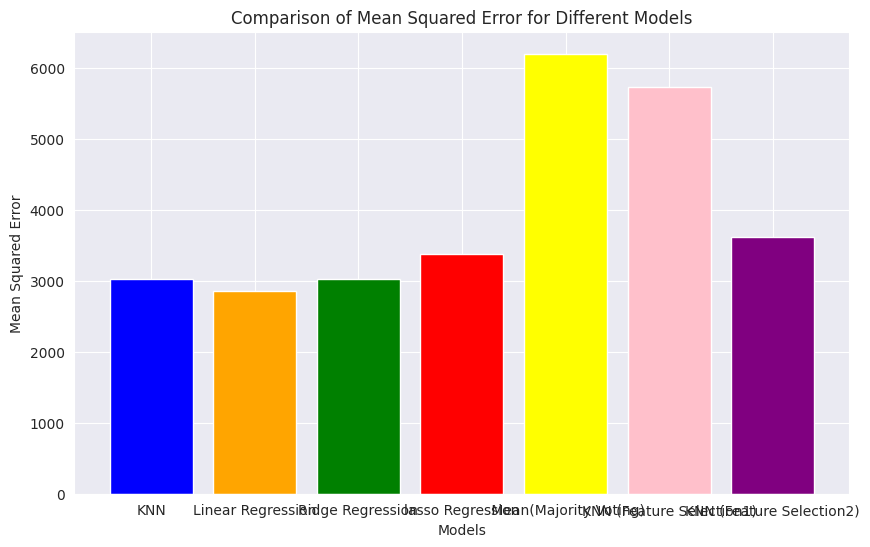

In [22]:
# رسم نمودار مقایسه‌ای
models = ['KNN', 'Linear Regression','Ridge Regression','lasso Regression', ' Mean(Majority Voting)', 'KNN (Feature Selection1)','KNN (Feature Selection2)']
mse_values = [mse1, mse2,mse_ridge,mse_lasso,mse3, mse4,mse5]



plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red','yellow','pink','purple'])
plt.title('Comparison of Mean Squared Error for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


features = data.drop(['target', 'Cluster'], axis=1)
target = data['target']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.13, random_state=0)

# تعداد نزدیکترین همسایه‌ها
k = int(np.sqrt(len(y_train))) + 1

# برای ذخیره پیش‌بینی‌ها نهایی
final_predictions = []

# برای هر نمونه در X_test
for test_index in range(X_test.shape[0]):
    test_value = X_test.iloc[test_index].values.reshape(1, -1)  # تبدیل به شکل مناسب
    feature_predictions = []  # لیست برای ذخیره پیش‌بینی‌ها بر اساس هر ویژگی

    # برای هر ویژگی، KNN را اجرا می‌کنیم
    for feature_index in range(X_train.shape[1]):
        # تنها ویژگی جاری را انتخاب می‌کنیم
        knn_regressor = KNeighborsRegressor(n_neighbors=k)

        # ویژگی جاری را جدا می‌کنیم
        X_train_feature = X_train.iloc[:, feature_index].values.reshape(-1, 1)
        knn_regressor.fit(X_train_feature, y_train)  # آموزش مدل

        # پیش‌بینی برای داده تست
        test_feature_value = X_test.iloc[test_index, feature_index].reshape(-1, 1)
        predicted_value = knn_regressor.predict(test_feature_value)

        feature_predictions.append(predicted_value[0])  # ذخیره پیش‌بینی

    # محاسبه میانگین پیش‌بینی‌ها برای نمونه تست
    final_prediction = np.mean(feature_predictions)
    final_predictions.append(final_prediction)  # ذخیره پیش‌بینی نهایی برای این نمونه

# تبدیل پیش‌بینی‌ها به numpy array
final_predictions_array = np.array(final_predictions)

# اکنون از پیش‌بینی‌های نهایی برای آموزش رگرسیون‌های مختلف استفاده می‌کنیم

# تقسیم پیش‌بینی‌ها به داده‌های آموزشی و آزمایشی
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_predictions_array.reshape(-1, 1), y_test, test_size=0.13, random_state=0)

# رگرسیون خطی
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_final, y_train_final)
linear_predictions = linear_regressor.predict(X_test_final)


# محاسبه MSE
mse_linear = mean_squared_error(y_test_final, linear_predictions)


# نمایش نتایج
print(f'Mean Squared Error for Linear Regression: {mse_linear}')


Mean Squared Error for Linear Regression: 2414.1218407860356
